In [1]:
import numpy as np

# 一、初始化数据

  * 使用 **np.arange** 生成从0到6，步长为1 的数组 ，(0,6)左闭右开,即结果停留在5。

In [2]:
np.arange(0,6,1,np.float32)

array([ 0.,  1.,  2.,  3.,  4.,  5.], dtype=float32)

*  用 **np.linspace(0,2,5)** 来生成起始值为0、结束值为2、个数为5的数组。 这里5表示5个数，那么0-2之间的间隔就有4个，间隔值为0.5

In [3]:
np.linspace(0,2, 5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ])

 * 可使用 **np.reshape** 方法来对数组重新排列。

In [4]:
data=np.arange(0,6,1,np.float32)
data=data.astype('int')
np.reshape(data,(-1,3))

array([[0, 1, 2],
       [3, 4, 5]])

* 使用 **np.array()** 将普通python数组转为numpy管理的ndarray数组

In [5]:
arr = [1,3,4,5]
ndarr = np.array(arr)
ndarr.reshape(2,2)

array([[1, 3],
       [4, 5]])

 * 使用 **ones /zeros/ zeros_like** 便捷生成比较常用的数组，如全 1 、全 0 数组
 

In [6]:
np.ones((3,2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [7]:
np.zeros((3,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [8]:
arr = [[1,2,3],[3,2,1]]
np.zeros_like(arr)

array([[0, 0, 0],
       [0, 0, 0]])

 * 使用 **np.random.normal**来生成高斯分布数组，均值为0 、标准差为0.05、形状为 3行、2列

In [9]:
np.random.normal(0, 0.05,(3)) 

array([-0.00463891,  0.04610835, -0.01356317])

   * 使用 **np.random.randn(3)**来生成正态分布，即均值为0、标准差为0.05的高斯分布。numpy提供了np.random.randn方法来简化操作。

In [10]:
np.random.randn(3) 

array([-2.28676381,  0.78061822,  1.36720178])

* 图形化正态分布

-0.0148288563276
0.947581587027


(array([   6.,   40.,  108.,  176.,  253.,  212.,  132.,   46.,   20.,    7.]),
 array([-2.75054713, -2.16658429, -1.58262144, -0.9986586 , -0.41469576,
         0.16926708,  0.75322993,  1.33719277,  1.92115561,  2.50511846,
         3.0890813 ]),
 <a list of 10 Patch objects>)

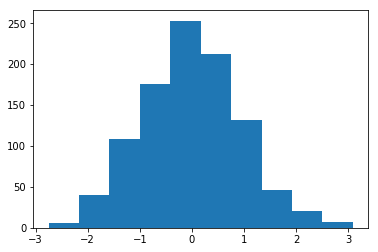

In [11]:
mu, sigma = 0, 1
s = np.random.normal(loc=mu, scale=sigma, size=1000)
print np.mean(s)
print np.std(s)
%matplotlib inline
import matplotlib.pyplot as plt  
plt.hist(s)

* **np.vstack** 垂直扩展，可以理解为数据库表中直接插入新数据 <br/>
  **np.hstack** 水平扩展，可以理解为，在数据库表修改对应行，使得行数据等于 原数据+新数据

In [12]:
a = np.array([[1], [2], [3]])
b = np.array([[2], [3], [4]])
np.vstack((a,b))

array([[1],
       [2],
       [3],
       [2],
       [3],
       [4]])

In [13]:
np.hstack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

# 二、线性代数操作

> Skyler Speakman曾说：“线性代数式21世纪的数学”，我完全赞同该论述。在ML领域，线性代数无处不在。矩阵运算、主成分分析（PCA）、奇异值分解（SVD）、特征分解、LU分解、QR分解、对称矩阵、正交化&标准正交化、投射、特征值&特征向量、向量空间和规范等这些概念对理解机器学习的优化方法都是必须的。我认为线性代数很棒的一点是，互联网上的资源非常多。我总是说传统课堂要消亡，因为互联网上有如此大量的资源。我最喜欢的线性代数课程是MIT的Gilbert Strang教授的。

* 可以这样理解： 一维数组的称为向量，多维的数组称为矩阵。
  在java的思路里面，进行两个向量相乘，可以用 
    ```java 
      int [] x1 = [1,2,3];
      int [] x2=[3,2,1];
      int [] xnew =[0,0,0];
      for(int i=0;i <x1.size();i++)
      { 
        xnew[i]=x1[i]*x2[i]
      }
    ```
  来完成，而在python中可以用numpy简单的完成：

In [14]:
x1 = np.array([1,2,3])
x2= np.array([3,2,1])
print x1.ndim
print x1*x2

1
[3 4 3]


* 使用 **np.linalg.eig(j)** 获取矩阵的特征向量以及特征值。 <br> 注意的是，返回值有 特征值w 以及对应的特征向量W。 因为返回值两者都是数组，其对应关系为 W[:,-1]  对应 w[1] .具体看下面的列子。

> 特征值的定义： 设A是n阶矩阵，如果数 λ 和 n 维非零列向量ε使关系式：  <br>  
>            A ε =  λε 成立  <br>          
>  那么，这样的数 λ 称为矩阵 A的特征值，非零向量 ε称为A 对应于特征值 λ 的特征向量。 <br>

参见工程数学线性代数第六版 P120

In [24]:
j =np.array([[3,-1],[-1,3]])
print j
w,W = np.linalg.eig(j)
print w
print W
print w[0]
print W[:,0]

[[ 3 -1]
 [-1  3]]
[ 4.  2.]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
4.0
[ 0.70710678 -0.70710678]


* 协方差

# 三、实践问题

   对任意形状的二维矩阵 x ，构建 softmax（x） 函数使得函数返回结果与 二维矩阵x 形状相同，<br>
   且x矩阵中的每一个元素等于该元素的指数值与矩阵中与该元素同位的所有元素指数和 相除。
   即如下公式：
   <img src='softmax.png'>
   softmax函数是机器学习多项式分类问题中常用到的 概率分布激活函数。
   
   给定的测试用例为：

In [21]:
a = [[1,2,3],[3,2,1],[4,5,6]]
arr = np.array(a)
cov_mat = np.cov(arr)
np.linalg.eig(cov_mat)


(array([  3.00000000e+00,  -7.50963641e-17,   6.16297582e-33]),
 array([[  5.77350269e-01,   6.09781659e-01,  -8.29144485e-17],
        [ -5.77350269e-01,   7.75129861e-01,   7.07106781e-01],
        [  5.77350269e-01,   1.65348202e-01,   7.07106781e-01]]))

In [51]:
x =np.linspace(1,3,6)
arrX = np.vstack((x,np.ones_like(x),np.ones_like(x)*0.2))
print arrX
print arrX.shape, arrX.ndim

[[ 1.   1.4  1.8  2.2  2.6  3. ]
 [ 1.   1.   1.   1.   1.   1. ]
 [ 0.2  0.2  0.2  0.2  0.2  0.2]]
(3L, 6L) 2


建议自己先思考下再看下面的语句。<br>
可以看到 一句话就可以搞定心目中的多重循环。

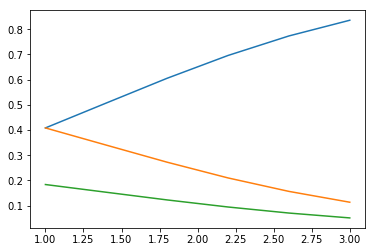

In [53]:
def softmax(x):
   return np.exp(x)/np.sum(np.exp(x),axis=0)

plt.plot(x,softmax(arrX).T)
